<a href="https://colab.research.google.com/github/Glorc12/Snegrs-ISP-22/blob/main/%D0%9F%D1%80%D0%BE%D0%B3%D0%BD%D0%BE%D0%B7_%D0%BD%D0%B0_%D0%B3%D0%BE%D1%82%D0%BE%D0%B2%D0%BD%D0%BE%D1%81%D1%82%D1%8C_%D0%BA%D1%83%D0%BF%D0%B8%D1%82%D1%8C_%D0%BC%D0%B0%D1%88%D0%B8%D0%BD%D0%BE%D0%BC%D0%B5%D1%81%D1%82%D0%BE.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Импорт Библиотек и зарузка данных

In [ ]:
# Установка необходимых библиотек
!pip install pandas scikit-learn lightgbm xgboost catboost matplotlib seaborn optuna --quiet

# Импорт библиотек
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import LabelEncoder, StandardScaler, MinMaxScaler
from sklearn.metrics import roc_auc_score
from sklearn.ensemble import RandomForestClassifier
import lightgbm as lgb
import xgboost as xgb
from catboost import CatBoostClassifier
from sklearn.linear_model import LogisticRegression, LassoCV
from sklearn.feature_selection import RFE
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt
import seaborn as sns
import shap


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.7/98.7 MB 7.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 364.4/364.4 kB 22.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 233.5/233.5 kB 13.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.6/78.6 kB 5.4 MB/s eta 0:00:00


/usr/local/lib/python3.10/dist-packages/dask/dataframe/__init__.py:42: FutureWarning: 
Dask dataframe query planning is disabled because dask-expr is not installed.

You can install it with `pip install dask[dataframe]` or `conda install dask`.
This will raise in a future version.

  warnings.warn(msg, FutureWarning)


In [ ]:
# Загрузка данных
train = pd.read_csv('/content/sample_data/train.csv', low_memory=False)
valid = pd.read_csv('/content/sample_data/valid.csv', low_memory=False)

# Выводим статистику

In [ ]:
train.head(14456)

,report_date,client_id,target,col1,col2,col3,col4,col5,col6,col7,...,col2654,col2655,col2656,col2657,col2658,col2659,col2660,col2661,col2662,col2663
0,2022-11-01,1,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.256261
1,2022-11-01,5,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,7616803.0,7616803.0,7616803.0,NaN,NaN,NaN,7616803.0,7616803.0,7616803.0,0.256261
2,2022-05-01,6,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.256261
3,2022-09-01,7,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.258682
4,2022-08-01,8,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.254164
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14451,2022-07-01,1241,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.276902
14452,2022-09-01,1969,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.260516
14453,2022-02-01,7116,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.260005
14454,2021-08-01,7117,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.256261


In [ ]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14456 entries, 0 to 14455
Columns: 2666 entries, report_date to col2663
dtypes: float64(2316), int64(3), object(347)
memory usage: 294.0+ MB


In [ ]:
train.describe()

,client_id,target,col1,col2,col3,col4,col5,col6,col7,col8,...,col2654,col2655,col2656,col2657,col2658,col2659,col2660,col2661,col2662,col2663
count,14456.000000,14456.000000,3.000000,6.000000,12.000000,19.000000,1.0,1.0,3.000000e+00,8.000000e+00,...,6.207000e+03,6.207000e+03,6.207000e+03,5.060000e+02,5.060000e+02,5.060000e+02,8.036000e+03,8.036000e+03,8.036000e+03,14456.000000
mean,2853.066270,0.030160,0.333333,0.500000,0.306548,0.346140,7464071.0,7464071.0,4.762016e+06,4.127563e+06,...,6.951439e+06,6.843002e+06,6.896837e+06,7.042210e+06,7.025990e+06,7.034100e+06,6.934524e+06,6.806725e+06,6.869273e+06,0.258330
std,1957.002315,0.171035,0.577350,0.547723,0.460514,0.452933,NaN,NaN,2.395190e+06,1.430218e+06,...,4.539805e+06,4.509677e+06,4.509058e+06,5.162596e+06,5.160387e+06,5.160985e+06,4.354458e+06,4.315602e+06,4.314412e+06,0.006802
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,7464071.0,7464071.0,2.900000e+06,2.900000e+06,...,3.000000e+05,1.000000e+05,3.000000e+05,4.692700e+05,4.692700e+05,4.692700e+05,3.000000e+05,1.000000e+05,3.000000e+05,0.230229
25%,1186.000000,0.000000,0.000000,0.000000,0.000000,0.000000,7464071.0,7464071.0,3.410988e+06,3.666482e+06,...,4.316300e+06,4.248000e+06,4.300000e+06,4.413816e+06,4.413816e+06,4.413816e+06,4.334639e+06,4.276000e+06,4.303000e+06,0.256261
50%,2568.000000,0.000000,0.000000,0.500000,0.000000,0.000000,7464071.0,7464071.0,3.921976e+06,3.921976e+06,...,6.240000e+06,6.164000e+06,6.224000e+06,6.322850e+06,6.322850e+06,6.322850e+06,6.244578e+06,6.146774e+06,6.225550e+06,0.256261
75%,4258.250000,0.000000,0.500000,1.000000,0.758929,0.839286,7464071.0,7464071.0,5.693024e+06,3.958614e+06,...,8.801262e+06,8.649254e+06,8.748625e+06,9.110361e+06,9.110361e+06,9.110361e+06,8.769750e+06,8.619750e+06,8.700000e+06,0.257217
max,8302.000000,1.000000,1.000000,1.000000,1.000000,1.000000,7464071.0,7464071.0,7.464071e+06,7.464071e+06,...,9.800000e+07,9.800000e+07,9.800000e+07,9.524250e+07,9.524250e+07,9.524250e+07,9.800000e+07,9.800000e+07,9.800000e+07,0.339800


In [ ]:
# Вычислить общее количество строк
total_rows = train.shape[0]

# Вычислить процент пропущенных значений для каждого столбца
missing_values = (train.isnull().sum() / total_rows) * 100

# Вывести столбцы с пропущенными значениями и их проценты
print(missing_values[missing_values > 0])

# Альтернативно, пройтись по каждому столбцу и вывести процент пропущенных значений
for column in train.columns:
    missing_count =train[column].isnull().sum()
    if missing_count > 0:
        missing_percentage = (missing_count / total_rows) * 100
        print(f"{column}: {missing_percentage:.2f}%")

col1       99.979247
col2       99.958495
col3       99.916989
col4       99.868567
col5       99.993082
             ...    
col2658    96.499723
col2659    96.499723
col2660    44.410625
col2661    44.410625
col2662    44.410625
Length: 2661, dtype: float64
col1: 99.98%
col2: 99.96%
col3: 99.92%
col4: 99.87%
col5: 99.99%
col6: 99.99%
col7: 99.98%
col8: 99.94%
col9: 99.99%
col10: 99.99%
col11: 99.98%
col12: 99.94%
col13: 99.99%
col14: 99.99%
col15: 99.98%
col16: 99.94%
col17: 99.99%
col18: 99.99%
col19: 99.98%
col20: 99.94%
col21: 99.99%
col22: 99.99%
col23: 99.98%
col24: 99.94%
col25: 99.99%
col26: 99.99%
col27: 99.98%
col28: 99.94%
col29: 99.99%
col30: 99.99%
col31: 99.98%
col32: 99.94%
col33: 99.99%
col34: 99.99%
col35: 99.98%
col36: 99.94%
col37: 99.99%
col38: 99.99%
col39: 99.98%
col40: 99.94%
col41: 99.99%
col42: 99.99%
col43: 99.98%
col44: 99.94%
col45: 99.97%
col46: 99.88%
col47: 99.69%
col48: 99.17%
col49: 99.97%
col50: 99.89%
col51: 99.73%
col52: 99.26%
col53: 99.97%
col54: 

Вот тут я понял что датасет очень плохо заполненный и смысл работать есть как примерно с 500 признаками или того меньши потому что они зотя бы заполненны на процентов на 30 что дает нам пространства для маневра

In [ ]:
train.describe(include=['object'])

,report_date,col49,col50,col51,col52,col53,col54,col55,col56,col57,...,col1653,col1654,col2191,col2192,col2193,col2194,col2195,col2196,col2197,col2198
count,14456,5,16,39,107,5,18,45,120,5,...,2,18,19,66,106,156,273,353,36,369
unique,25,5,8,9,18,5,9,10,20,3,...,2,11,7,21,33,38,45,50,17,50
top,2023-01-01,https://samolet.ru/commercial/,https://samolet.ru/,https://samolet.ru/,https://samolet.ru/project/,https://samolet.ru/commercial/,https://samolet.ru/,https://samolet.ru/,https://samolet.ru/project/,main,...,Тестовая бронь,Дубль заявки,Замена квартиры,Замена квартиры,Замена квартиры,Замена квартиры,Замена квартиры,Замена квартиры,Замена квартиры,Замена квартиры
freq,1159,1,6,17,40,1,6,19,45,3,...,1,3,13,42,59,82,146,189,20,191


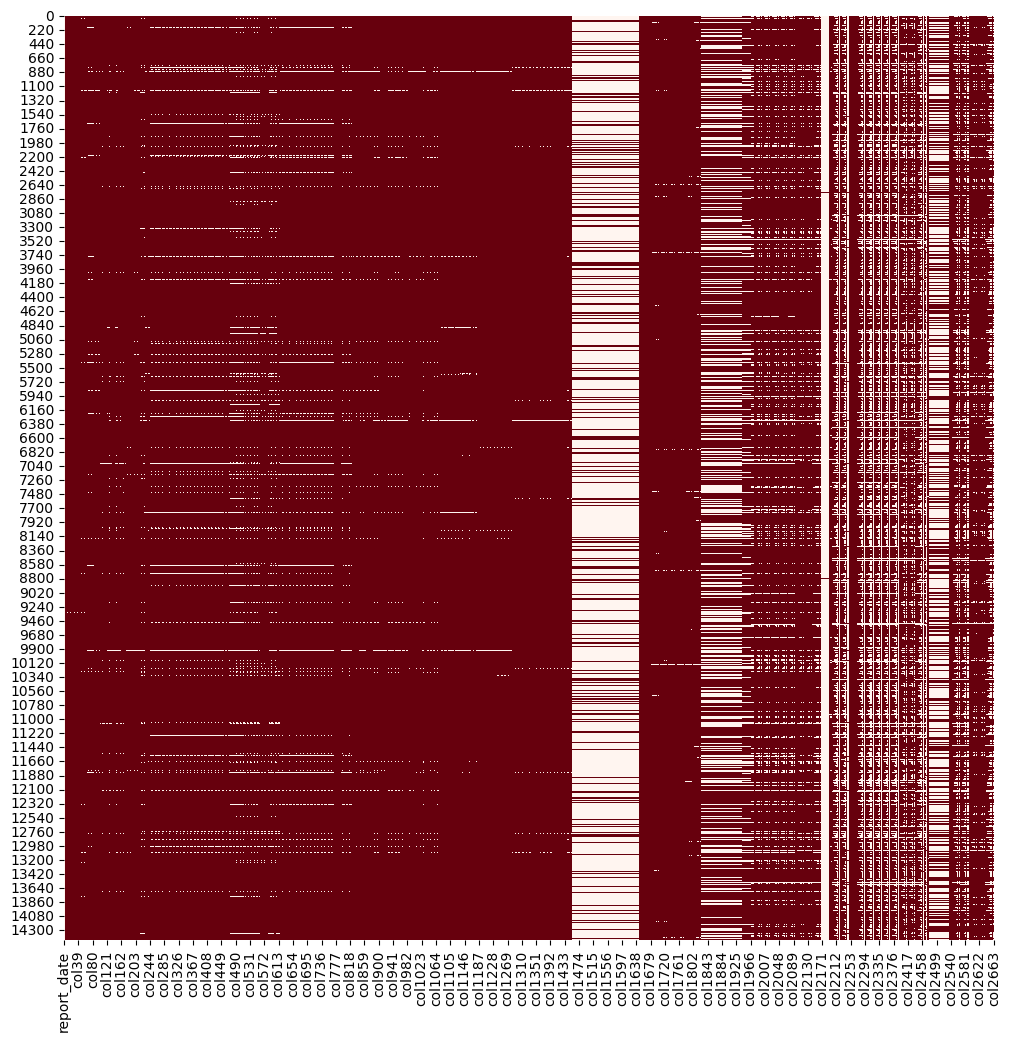

In [ ]:
fig, ax = plt.subplots(figsize=(12, 12))
sns.heatmap(train.isnull(), cbar = False, cmap = 'Reds')
plt.show()

In [ ]:
# Устанавливаем порог заполненности
threshold = 0.2

# Рассчитываем порог количества ненулевых значений
min_non_null_count = int(threshold * len(train))

# Удаляем столбцы, где количество ненулевых значений меньше порога
filtered_train = train.dropna(axis=1, thresh=min_non_null_count)

# Сохраняем результат (опционально)
filtered_train.to_csv("filtered_train.csv", index=False)

print("Удалены столбцы с менее чем 20% заполненности данных.")

Удалены столбцы с менее чем 20% заполненности данных.


In [ ]:
filtered_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14456 entries, 0 to 14455
Columns: 539 entries, report_date to col2663
dtypes: float64(534), int64(3), object(2)
memory usage: 59.4+ MB


In [ ]:
filtered_train = filtered_train.copy()

# Добавляем столбец с количеством ненулевых значений
filtered_train['non_null_count'] = filtered_train.notnull().sum(axis=1)

# Сортируем строки по количеству ненулевых значений
train_sorted = filtered_train.sort_values(by='non_null_count', ascending=False)

# Сохраняем только первые 3000 строк
filtered_train = train_sorted.head(3000)

# Удаляем вспомогательный столбец
filtered_train = filtered_train.drop(columns=['non_null_count'])

# Сохраняем результат (опционально)
filtered_train.to_csv("filtered_train.csv", index=False)

print("Фильтрация завершена. Сохранено 3000 строк с наибольшим количеством данных.")

Фильтрация завершена. Сохранено 3000 строк с наибольшим количеством данных.


In [ ]:
filtered_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3000 entries, 4587 to 4322
Columns: 539 entries, report_date to col2663
dtypes: float64(534), int64(3), object(2)
memory usage: 12.4+ MB


In [ ]:
for column in filtered_train.columns:
    print(f"Столбец: {column}")
    print(train[column].unique())
    print("-" * 50)


Выходные данные были обрезаны до нескольких последних строк (5000).
[ 0. nan  1.]
--------------------------------------------------
Столбец: col1522
[ 0. nan  1.]
--------------------------------------------------
Столбец: col1523
[ 0. nan  1.]
--------------------------------------------------
Столбец: col1524
[ 0. nan  1.]
--------------------------------------------------
Столбец: col1525
[ 0. nan  1.]
--------------------------------------------------
Столбец: col1526
[ 0. nan  1.]
--------------------------------------------------
Столбец: col1527
[ 0. nan]
--------------------------------------------------
Столбец: col1528
[ 0. nan]
--------------------------------------------------
Столбец: col1529
[ 0. nan]
--------------------------------------------------
Столбец: col1530
[ 0. nan]
--------------------------------------------------
Столбец: col1531
[ 0. nan]
--------------------------------------------------
Столбец: col1532
[ 0. nan]
----------------------------------------

In [ ]:
# Calculate the total number of rows
total_rows = filtered_train.shape[0]

# Calculate the percentage of missing values for each column
missing_values = (filtered_train.isnull().sum() / total_rows) * 100

# Print the columns with missing values and their percentages
print(missing_values[missing_values > 0])

# Alternatively, loop through each column and print the percentage of missing values
for column in filtered_train.columns:
    missing_count = filtered_train[column].isnull().sum()
    if missing_count > 0:
        missing_percentage = (missing_count / total_rows) * 100
        print(f"{column}: {missing_percentage:.2f}%")

col2208    57.333333
col2209    57.333333
col2210    57.333333
col2211    31.433333
col2212    31.433333
             ...    
col2655    22.633333
col2656    22.633333
col2660    16.100000
col2661    16.100000
col2662    16.100000
Length: 179, dtype: float64
col2208: 57.33%
col2209: 57.33%
col2210: 57.33%
col2211: 31.43%
col2212: 31.43%
col2213: 31.43%
col2214: 3.33%
col2215: 3.33%
col2216: 3.33%
col2235: 40.23%
col2236: 40.23%
col2237: 40.23%
col2238: 11.87%
col2239: 11.87%
col2240: 11.87%
col2244: 7.33%
col2245: 7.33%
col2246: 7.33%
col2280: 57.13%
col2281: 57.13%
col2282: 57.13%
col2283: 31.23%
col2284: 31.23%
col2285: 31.23%
col2286: 3.13%
col2287: 3.13%
col2288: 3.13%
col2304: 57.13%
col2305: 57.13%
col2306: 57.13%
col2307: 31.23%
col2308: 31.23%
col2309: 31.23%
col2310: 3.13%
col2311: 3.13%
col2312: 3.13%
col2328: 57.13%
col2329: 57.13%
col2330: 57.13%
col2331: 31.23%
col2332: 31.23%
col2333: 31.23%
col2334: 3.13%
col2335: 3.13%
col2336: 3.13%
col2352: 58.27%
col2353: 58.27%
col2

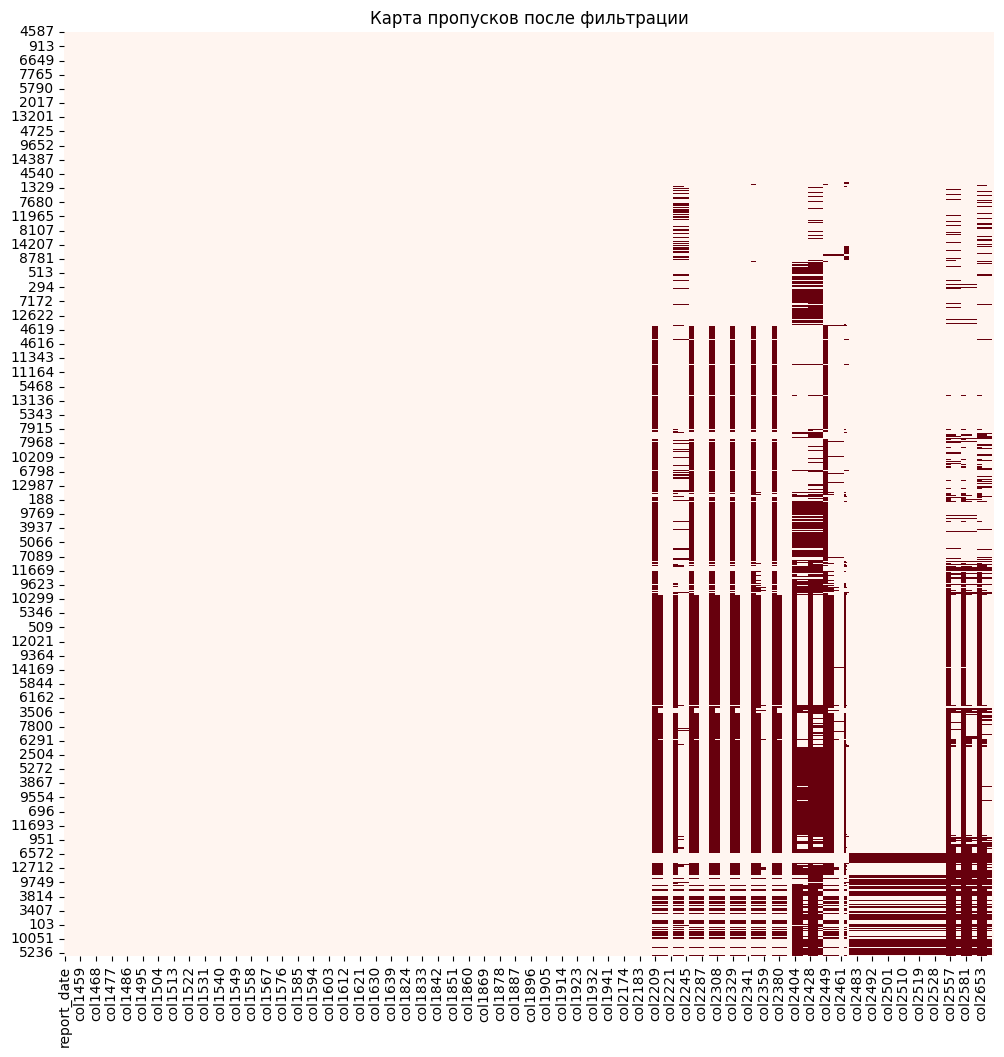

In [ ]:
# Визуализация
fig, ax = plt.subplots(figsize=(12, 12))
sns.heatmap(filtered_train.isnull(), cbar=False, cmap='Reds')
plt.title("Карта пропусков после фильтрации")
plt.show()

In [ ]:
filtered_train.describe()

,client_id,target,col1453,col1455,col1456,col1457,col1458,col1459,col1460,col1461,...,col2651,col2652,col2653,col2654,col2655,col2656,col2660,col2661,col2662,col2663
count,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,...,1.519000e+03,1.519000e+03,1.519000e+03,2.321000e+03,2.321000e+03,2.321000e+03,2.517000e+03,2.517000e+03,2.517000e+03,3000.000000
mean,3386.056667,0.039667,0.164333,0.022667,0.180333,0.390000,0.580333,1.038333,1.635667,0.140333,...,7.944951e+06,7.848918e+06,7.896456e+06,7.773367e+06,7.594928e+06,7.682229e+06,7.723525e+06,7.484389e+06,7.600656e+06,0.261183
std,2117.105082,0.195207,0.370640,0.163794,0.528431,0.759446,0.856616,1.051617,1.288726,0.483788,...,5.382518e+06,5.373178e+06,5.368461e+06,5.305421e+06,5.275443e+06,5.264630e+06,5.220339e+06,5.175979e+06,5.160662e+06,0.010424
min,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,3.000000e+05,3.000000e+05,3.000000e+05,3.000000e+05,1.910000e+05,3.000000e+05,3.000000e+05,1.910000e+05,3.000000e+05,0.235224
25%,1583.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,...,5.177190e+06,5.138000e+06,5.151845e+06,5.000000e+06,4.960000e+06,5.000000e+06,5.000000e+06,4.900000e+06,5.000000e+06,0.256919
50%,3212.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,...,7.192000e+06,7.054000e+06,7.106000e+06,7.000000e+06,6.905730e+06,6.970000e+06,6.975000e+06,6.800000e+06,6.875000e+06,0.257217
75%,5004.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,2.000000,0.000000,...,1.000000e+07,9.880000e+06,9.886298e+06,9.860000e+06,9.552000e+06,9.680000e+06,9.800000e+06,9.356482e+06,9.578791e+06,0.261486
max,8302.000000,1.000000,1.000000,3.000000,7.000000,8.000000,8.000000,12.000000,19.000000,7.000000,...,9.524250e+07,9.524250e+07,9.524250e+07,9.524250e+07,9.524250e+07,9.524250e+07,9.524250e+07,9.524250e+07,9.524250e+07,0.339800


In [ ]:
Напиши график выбросов

In [ ]:
# Пример обработки выбросов с помощью IQR
for col in filtered_train.select_dtypes(include=['float64', 'int64']):
    Q1 = filtered_train[col].quantile(0.25)
    Q3 = filtered_train[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Заменяем выбросы на границы
    filtered_train[col] = np.where(filtered_train[col] < lower_bound, lower_bound, filtered_train[col])
    filtered_train[col] = np.where(filtered_train[col] > upper_bound, upper_bound, filtered_train[col])

In [ ]:
# Заполнение медианой для всех числовых столбцов с пропусками
for col in filtered_train.select_dtypes(include=['float64', 'int64']):
    if filtered_train[col].isnull().sum() > 0:
        filtered_train[col] = filtered_train[col].fillna(filtered_train[col].median())

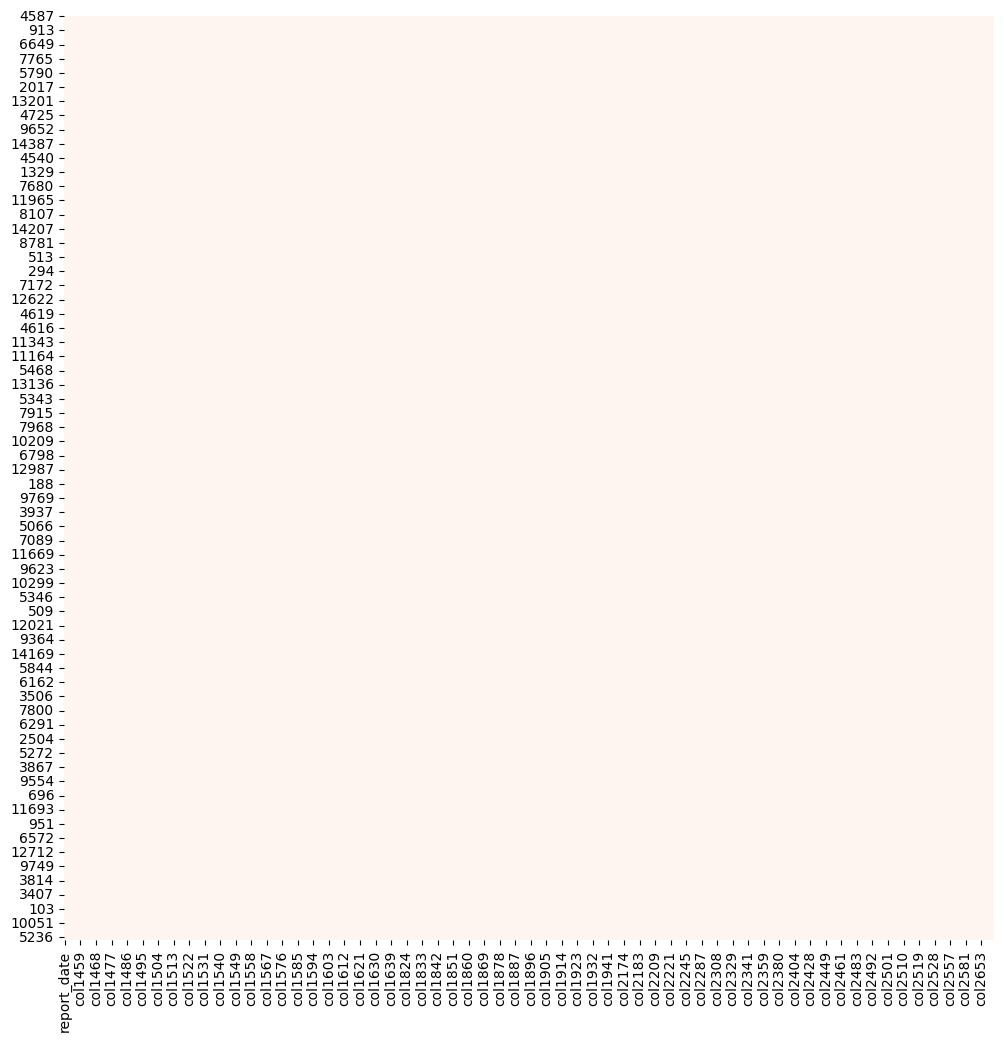

In [ ]:
fig, ax = plt.subplots(figsize=(12, 12))
sns.heatmap(filtered_train.isnull(), cbar = False, cmap = 'Reds')
plt.show()

In [ ]:
filtered_train.describe(include=['object'])

,report_date,col1454
count,3000,3000
unique,13,1638
top,2023-01-01,d2e2c52d-61a5-423a-b6d8-e540c15c5174
freq,402,7


In [ ]:
filtered_train.head(20)

,report_date,client_id,target,col1453,col1454,col1455,col1456,col1457,col1458,col1459,...,col2651,col2652,col2653,col2654,col2655,col2656,col2660,col2661,col2662,col2663
4587,2022-04-01,4678.0,0.0,0.0,8d818007-99ed-48d6-97f2-b469d2fa6d46,0.0,0.0,2.0,2.0,2.0,...,4700000.0,4700000.0,4700000.0,4700000.0,4700000.0,4700000.0,4700000.0,4700000.0,4700000.0,0.256919
7993,2023-01-01,6366.0,0.0,0.0,5a0e8218-b84e-ed11-b824-005056b89b68,0.0,0.0,0.0,1.0,1.0,...,4000000.0,4000000.0,4000000.0,4000000.0,4000000.0,4000000.0,4000000.0,4000000.0,4000000.0,0.257217
3751,2022-04-01,343.0,0.0,0.0,cb95a13c-c210-4322-8df1-4b049b6d54d4,0.0,0.0,2.0,2.5,2.5,...,3000000.0,3000000.0,3000000.0,3000000.0,3000000.0,3000000.0,3000000.0,3000000.0,3000000.0,0.263026
2753,2023-01-01,3299.0,0.0,0.0,652108da-937b-ed11-b824-005056b89b68,0.0,0.0,1.0,1.0,1.0,...,7106000.0,7106000.0,7106000.0,7106000.0,7106000.0,7106000.0,7106000.0,7106000.0,7106000.0,0.261033
13497,2022-07-01,6201.0,0.0,0.0,ce526345-4bab-ec11-b823-005056b8a72c,0.0,0.0,0.0,0.0,1.0,...,10088699.0,10088699.0,10088699.0,10088699.0,10088699.0,10088699.0,10088699.0,10088699.0,10088699.0,0.258133
13496,2022-05-01,6201.0,0.0,0.0,ce526345-4bab-ec11-b823-005056b8a72c,0.0,0.0,1.0,1.0,1.0,...,10088699.0,10088699.0,10088699.0,10088699.0,10088699.0,10088699.0,10088699.0,10088699.0,10088699.0,0.258133
440,2022-05-01,651.0,0.0,0.0,8f0b7144-f29a-ec11-b822-005056b89b68,0.0,0.0,2.0,2.0,2.0,...,3000000.0,3000000.0,3000000.0,3000000.0,3000000.0,3000000.0,3000000.0,3000000.0,3000000.0,0.256919
8611,2022-08-01,1013.0,0.0,0.0,62e10146-e6d4-ec11-b826-005056b81dee,0.0,0.0,0.0,1.0,1.0,...,6000000.0,6000000.0,6000000.0,6000000.0,6000000.0,6000000.0,6000000.0,6000000.0,6000000.0,0.257217
6373,2022-06-01,5697.0,0.0,0.0,b0013fb2-f8a4-ec11-b822-005056b8a72c,0.0,0.0,0.0,1.0,1.0,...,3000000.0,3000000.0,3000000.0,3000000.0,3000000.0,3000000.0,3000000.0,3000000.0,3000000.0,0.256919
5391,2022-11-01,4242.0,0.0,0.0,59c3339c-07f2-ec11-b824-005056b89b68,0.0,0.0,0.0,0.0,1.0,...,11958828.0,11958828.0,11958828.0,11958828.0,11958828.0,11958828.0,11958828.0,11958828.0,11958828.0,0.268337


In [ ]:
# Calculate the total number of rows
total_rows = filtered_train.shape[0]

# Calculate the percentage of missing values for each column
missing_values = (filtered_train.isnull().sum() / total_rows) * 100

# Print the columns with missing values and their percentages
print(missing_values[missing_values > 0])

# Alternatively, loop through each column and print the percentage of missing values
for column in filtered_train.columns:
    missing_count = filtered_train[column].isnull().sum()
    if missing_count > 0:
        missing_percentage = (missing_count / total_rows) * 100
        print(f"{column}: {missing_percentage:.2f}%")

Series([], dtype: float64)


In [31]:
filtered_train.to_csv("filtered_train_complete.csv", index=False)

In [ ]:
# Обработка колонки report_date
# Преобразование в формат datetime
filtered_train['report_date'] = pd.to_datetime(filtered_train['report_date'], errors='coerce')

# Проверка на наличие пропусков после преобразования
if filtered_train['report_date'].isnull().sum() > 0:
    print("Пропуски в report_date обнаружены после преобразования в datetime.")
    # Заполнение пропусков медианной датой (опционально)
    median_date = filtered_train['report_date'].median()
    filtered_train['report_date'] = filtered_train['report_date'].fillna(median_date)

# Извлечение числовых признаков из даты (оптимизированный подход)
new_columns = pd.DataFrame({
    'year': filtered_train['report_date'].dt.year,
    'month': filtered_train['report_date'].dt.month,
    'day': filtered_train['report_date'].dt.day
}, index=filtered_train.index)

# Добавляем новые столбцы сразу
filtered_train = pd.concat([filtered_train, new_columns], axis=1)

# Удаление оригинального столбца report_date
filtered_train = filtered_train.drop(columns=['report_date'])

print("Обработка report_date завершена.")


Обработка report_date завершена.


In [ ]:
filtered_train.drop(columns=['col1454'], axis=1, inplace=True)

In [30]:
filtered_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3000 entries, 4587 to 4322
Columns: 540 entries, client_id to day
dtypes: float64(537), int32(3)
memory usage: 12.3 MB


In [ ]:
# Выделение целевой переменной и признаков
X = data.drop(columns=['target'])
y = data['target']

In [ ]:
# Масштабирование числовых признаков
num_cols = X.select_dtypes(include=['float64', 'int64']).columns
scaler = StandardScaler()
X[num_cols] = scaler.fit_transform(X[num_cols])

In [ ]:
# Разделение на обучающую и тестовую выборки
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# Анализ важных признаков с помощью Random Forest
model_rf = RandomForestClassifier(random_state=42)
model_rf.fit(X_train, y_train)

# Feature Importance
importance = model_rf.feature_importances_
important_features = pd.DataFrame({
    'Feature': X.columns,
    'Importance': importance
}).sort_values(by='Importance', ascending=False)

# Визуализация важности признаков
plt.figure(figsize=(10, 8))
sns.barplot(x='Importance', y='Feature', data=important_features.head(20))
plt.title('Top 20 Important Features')
plt.show()


In [ ]:
# RFE (Recursive Feature Elimination)
model_lr = LogisticRegression(max_iter=1000)
rfe = RFE(estimator=model_lr, n_features_to_select=20)
rfe.fit(X_train, y_train)

selected_features = X.columns[rfe.support_]
print("Selected Features by RFE:", selected_features)

In [ ]:
# LassoCV для отбора признаков
lasso = LassoCV(cv=5, random_state=42)
lasso.fit(X_train, y_train)
lasso_features = X.columns[lasso.coef_ != 0]
print("Selected Features by Lasso:", lasso_features)

In [ ]:
# SHAP для интерпретации
explainer = shap.TreeExplainer(model_rf)
shap_values = explainer.shap_values(X_test)

# Визуализация SHAP
shap.summary_plot(shap_values[1], X_test, feature_names=X.columns)

In [ ]:
# Итоговая модель с важными признаками
final_features = important_features.head(20)['Feature'].tolist()
X_train_final = X_train[final_features]
X_test_final = X_test[final_features]

final_model = RandomForestClassifier(random_state=42)
final_model.fit(X_train_final, y_train)
y_pred = final_model.predict(X_test_final)

# Оценка качества модели
print(classification_report(y_test, y_pred))


In [ ]:


# Выделение целевой переменной и признаков
X = data.drop(columns=['target'])
y = data['target']

# Кодирование категориальных переменных (если есть)
cat_cols = X.select_dtypes(include=['object']).columns
label_encoders = {}
for col in cat_cols:
    le = LabelEncoder()
    X[col] = le.fit_transform(X[col])
    label_encoders[col] = le

# Масштабирование числовых признаков
num_cols = X.select_dtypes(include=['float64', 'int64']).columns
scaler = StandardScaler()
X[num_cols] = scaler.fit_transform(X[num_cols])

# Разделение на обучающую и тестовую выборки
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Анализ важных признаков
# 1. Random Forest + Feature Importance
model_rf = RandomForestClassifier(random_state=42)
model_rf.fit(X_train, y_train)

# Feature Importance
importance = model_rf.feature_importances_
important_features = pd.DataFrame({
    'Feature': X.columns,
    'Importance': importance
}).sort_values(by='Importance', ascending=False)

# Визуализация важности признаков
plt.figure(figsize=(10, 8))
sns.barplot(x='Importance', y='Feature', data=important_features.head(20))
plt.title('Top 20 Important Features')
plt.show()

# 2. RFE (Recursive Feature Elimination)
model_lr = LogisticRegression(max_iter=1000)
rfe = RFE(estimator=model_lr, n_features_to_select=20)
rfe.fit(X_train, y_train)

selected_features = X.columns[rfe.support_]
print("Selected Features by RFE:", selected_features)

# 3. LassoCV
lasso = LassoCV(cv=5, random_state=42)
lasso.fit(X_train, y_train)
lasso_features = X.columns[lasso.coef_ != 0]
print("Selected Features by Lasso:", lasso_features)

# 4. SHAP для интерпретации
explainer = shap.TreeExplainer(model_rf)
shap_values = explainer.shap_values(X_test)

# Визуализация SHAP
shap.summary_plot(shap_values[1], X_test, feature_names=X.columns)

# Итоговая модель с важными признаками
final_features = important_features.head(20)['Feature'].tolist()
X_train_final = X_train[final_features]
X_test_final = X_test[final_features]

final_model = RandomForestClassifier(random_state=42)
final_model.fit(X_train_final, y_train)
y_pred = final_model.predict(X_test_final)

# Оценка качества модели
print(classification_report(y_test, y_pred))

# Модель

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_auc_score
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline



X = train.drop(columns=['client_id', 'target', 'report_date'])
y = train['target']

numeric_features = X.select_dtypes(include=['int64', 'float64']).columns
categorical_features = X.select_dtypes(include=['object', 'category']).columns

X[categorical_features] = X[categorical_features].astype(str)

numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
])

categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)
    ]
)

model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', RandomForestClassifier(random_state=42, n_estimators=100, class_weight='balanced'))
])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

model.fit(X_train, y_train)

test_preds = model.predict_proba(X_test)[:, 1]
test_score = roc_auc_score(y_test, test_preds)
print(f"ROC-AUC на тестовых данных: {test_score:.4f}")

submission = pd.DataFrame({'client_id': train.loc[X_test.index, 'client_id'], 'score': test_preds})
submission.to_csv('submission_file.csv', index=False)
print("Результаты сохранены в submission_file.csv")

Такие высокие результаты скорее сего связаны с переобучением модеди так учитывая качество данных а которых происходило обучение не может быть такого качества и точноти ответ